# Predict stock prices  with Long short-term memory (LSTM)

This simple example will show you how LSTM models predict time series data. Stock market data is a great choice for this because it's quite regular and widely available via the Internet.

## Install requirements
We install Tensorflow 2.0 with GPU support first

In [1]:
!pip install tensorflow-gpu==2.0.0-alpha0

ERROR: Could not find a version that satisfies the requirement tensorflow-gpu==2.0.0-alpha0 (from versions: 2.8.0rc0, 2.8.0rc1, 2.8.0, 2.8.1, 2.8.2, 2.8.3, 2.8.4, 2.9.0rc0, 2.9.0rc1, 2.9.0rc2, 2.9.0, 2.9.1, 2.9.2, 2.9.3, 2.10.0rc0, 2.10.0rc1, 2.10.0rc2, 2.10.0rc3, 2.10.0, 2.10.1, 2.11.0rc0, 2.11.0rc1, 2.11.0rc2, 2.11.0, 2.12.0)
ERROR: No matching distribution found for tensorflow-gpu==2.0.0-alpha0


In [2]:
!pip install pandas-datareader

In [3]:
!apt install graphviz

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
graphviz is already the newest version (2.42.2-6ubuntu0.1).
0 upgraded, 0 newly installed, 0 to remove and 49 not upgraded.


In [4]:
!pip install pydot pydot-ng

## Introduction

LSTMs are very powerful in sequence prediction problems. They can store past information.

## Loading the dataset
I use pandas-datareader to get the historical stock prices from Yahoo! finance. For this example, I get only the historical data till the end of *training_end_data*.  

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from pandas_datareader import data

In [8]:
import yfinance as yf

tickers = 'AAPL'

start_date = '1980-12-01'
end_date = '2023-12-31'


stock_data = yf.download(tickers, start=start_date, end=end_date)
print(stock_data)

[*********************100%***********************]  1 of 1 completed

Price                       Adj Close       Close        High         Low  \
Ticker                           AAPL        AAPL        AAPL        AAPL   
Date                                                                        
1980-12-12 00:00:00+00:00    0.098943    0.128348    0.128906    0.128348   
1980-12-15 00:00:00+00:00    0.093781    0.121652    0.122210    0.121652   
1980-12-16 00:00:00+00:00    0.086898    0.112723    0.113281    0.112723   
1980-12-17 00:00:00+00:00    0.089049    0.115513    0.116071    0.115513   
1980-12-18 00:00:00+00:00    0.091630    0.118862    0.119420    0.118862   
...                               ...         ...         ...         ...   
2023-12-22 00:00:00+00:00  192.868134  193.600006  195.410004  192.970001   
2023-12-26 00:00:00+00:00  192.320221  193.050003  193.889999  192.830002   
2023-12-27 00:00:00+00:00  192.419830  193.149994  193.500000  191.089996   
2023-12-28 00:00:00+00:00  192.848206  193.580002  194.660004  193.169998   

In [9]:
stock_data.head(10)

Price,Adj Close,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,,
1980-12-12 00:00:00+00:00,0.098943,0.128348,0.128906,0.128348,0.128348,469033600
1980-12-15 00:00:00+00:00,0.093781,0.121652,0.122210,0.121652,0.122210,175884800
1980-12-16 00:00:00+00:00,0.086898,0.112723,0.113281,0.112723,0.113281,105728000
1980-12-17 00:00:00+00:00,0.089049,0.115513,0.116071,0.115513,0.115513,86441600
1980-12-18 00:00:00+00:00,0.091630,0.118862,0.119420,0.118862,0.118862,73449600
1980-12-19 00:00:00+00:00,0.097223,0.126116,0.126674,0.126116,0.126116,48630400
1980-12-22 00:00:00+00:00,0.101954,0.132254,0.132813,0.132254,0.132254,37363200
1980-12-23 00:00:00+00:00,0.106257,0.137835,0.138393,0.137835,0.137835,46950400


In [10]:
stock_data.describe()

Price,Adj Close,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL,AAPL
count,10853.000000,10853.000000,10853.000000,10853.000000,10853.000000,1.085300e+04
mean,19.247876,20.071533,20.277636,19.846894,20.058032,3.214835e+08
std,41.426027,41.977971,42.403593,41.508546,41.940333,3.363666e+08
min,0.037856,0.049107,0.049665,0.049107,0.049665,0.000000e+00
25%,0.240471,0.294643,0.301339,0.287946,0.294643,1.160708e+08
50%,0.416669,0.511161,0.517857,0.502232,0.508929,2.090368e+08
75%,16.421124,18.924286,19.043928,18.712856,18.895714,4.014556e+08
max,197.361084,198.110001,199.619995,197.000000,198.020004,7.421641e+09


In [11]:
stock_data_len = stock_data['Close'].count()
print(stock_data_len)

Ticker
AAPL    10853
dtype: int64


I'm only interested in *close* prices

In [12]:
close_prices = stock_data.iloc[:, 1:2].values
print(close_prices)

[[1.28347993e-01]
 [1.21652000e-01]
 [1.12723000e-01]
 ...
 [1.93149994e+02]
 [1.93580002e+02]
 [1.92529999e+02]]


Of course, some of the weekdays might be public holidays in which case no price will be available. For this reason, we will fill the missing prices with the latest available prices

In [13]:
all_bussinessdays = pd.date_range(start=start_date, end=end_date, freq='B')
print(all_bussinessdays)

DatetimeIndex(['1980-12-01', '1980-12-02', '1980-12-03', '1980-12-04',
               '1980-12-05', '1980-12-08', '1980-12-09', '1980-12-10',
               '1980-12-11', '1980-12-12',
               ...
               '2023-12-18', '2023-12-19', '2023-12-20', '2023-12-21',
               '2023-12-22', '2023-12-25', '2023-12-26', '2023-12-27',
               '2023-12-28', '2023-12-29'],
              dtype='datetime64[ns]', length=11240, freq='B')


In [14]:
close_prices = stock_data.reindex(all_bussinessdays)
close_prices = stock_data.fillna(method='ffill')

<ipython-input-14-218da55dd8bc>:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  close_prices = stock_data.fillna(method='ffill')


In [16]:
close_prices.head(10)

Price,Adj Close,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,,
1980-12-12 00:00:00+00:00,0.098943,0.128348,0.128906,0.128348,0.128348,469033600
1980-12-15 00:00:00+00:00,0.093781,0.121652,0.122210,0.121652,0.122210,175884800
1980-12-16 00:00:00+00:00,0.086898,0.112723,0.113281,0.112723,0.113281,105728000
1980-12-17 00:00:00+00:00,0.089049,0.115513,0.116071,0.115513,0.115513,86441600
1980-12-18 00:00:00+00:00,0.091630,0.118862,0.119420,0.118862,0.118862,73449600
1980-12-19 00:00:00+00:00,0.097223,0.126116,0.126674,0.126116,0.126116,48630400
1980-12-22 00:00:00+00:00,0.101954,0.132254,0.132813,0.132254,0.132254,37363200
1980-12-23 00:00:00+00:00,0.106257,0.137835,0.138393,0.137835,0.137835,46950400


The dataset is now complete and free of missing values. Let's have a look to the data frame summary:

## Feature scaling

In [17]:
training_set = close_prices.iloc[:, 1:2].values

In [18]:
print(training_set)

[[1.28347993e-01]
 [1.21652000e-01]
 [1.12723000e-01]
 ...
 [1.93149994e+02]
 [1.93580002e+02]
 [1.92529999e+02]]


In [19]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)
print(training_set_scaled.shape)

(10853, 1)


LSTMs expect the data in a specific format, usually a 3D tensor. I start by creating data with 60 days and converting it into an array using NumPy. Next, I convert the data into a 3D dimension array with feature_set samples, 60 days and one feature at each step.

In [21]:
# Assuming 'training_set_scaled' is a numpy array and you want its length
stock_data_len = len(training_set_scaled)

features = []
labels = []
for i in range(60, stock_data_len):
    features.append(training_set_scaled[i-60:i, 0])
    labels.append(training_set_scaled[i, 0])

features = np.array(features)
labels = np.array(labels)

# Reshaping the features for the LSTM model
features = np.reshape(features, (features.shape[0], features.shape[1], 1))


In [22]:
print(labels)

[2.39486935e-04 2.59208163e-04 2.53573532e-04 ... 9.74957163e-01
 9.77128252e-01 9.71826837e-01]


In [23]:
print(features)

[[[4.00083990e-04]
  [3.66276240e-04]
  [3.21194149e-04]
  ...
  [3.29646077e-04]
  [2.84569064e-04]
  [2.59208163e-04]]

 [[3.66276240e-04]
  [3.21194149e-04]
  [3.35280708e-04]
  ...
  [2.84569064e-04]
  [2.59208163e-04]
  [2.39486935e-04]]

 [[3.21194149e-04]
  [3.35280708e-04]
  [3.52189681e-04]
  ...
  [2.59208163e-04]
  [2.39486935e-04]
  [2.59208163e-04]]

 ...

 [[8.77007519e-01]
  [8.70191403e-01]
  [8.76553132e-01]
  ...
  [9.82682054e-01]
  [9.77229253e-01]
  [9.74452314e-01]]

 [[8.70191403e-01]
  [8.76553132e-01]
  [8.82864323e-01]
  ...
  [9.77229253e-01]
  [9.74452314e-01]
  [9.74957163e-01]]

 [[8.76553132e-01]
  [8.82864323e-01]
  [8.95890629e-01]
  ...
  [9.74452314e-01]
  [9.74957163e-01]
  [9.77128252e-01]]]


Feature tensor with three dimension: features[0] contains the ..., features[1] contains the last 60 days of values and features [2] contains the  ...

In [24]:
print(features.shape)

(10793, 60, 1)


## Create the LSTM network
Let's create a sequenced LSTM network with 50 units. Also the net includes some dropout layers with 0.2 which means that 20% of the neurons will be dropped.

In [25]:
import tensorflow as tf

In [26]:
model = tf.keras.models.Sequential([
    tf.keras.layers.LSTM(units = 50, return_sequences = True, input_shape = (features.shape[1], 1)),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.LSTM(units = 50, return_sequences = True),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.LSTM(units = 50, return_sequences = True),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.LSTM(units = 50),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(units = 1)
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [27]:
print(model.summary())

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 60, 50)              │          10,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 60, 50)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 60, 50)              │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 60, 50)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_2 (LSTM)                        │ (None, 60, 50)              │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 60, 50)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_3 (LSTM)                        │ (None, 50)                  │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 50)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 71,051 (277.54 KB)

 Trainable params: 71,051 (277.54 KB)

 Non-trainable params: 0 (0.00 B)

None


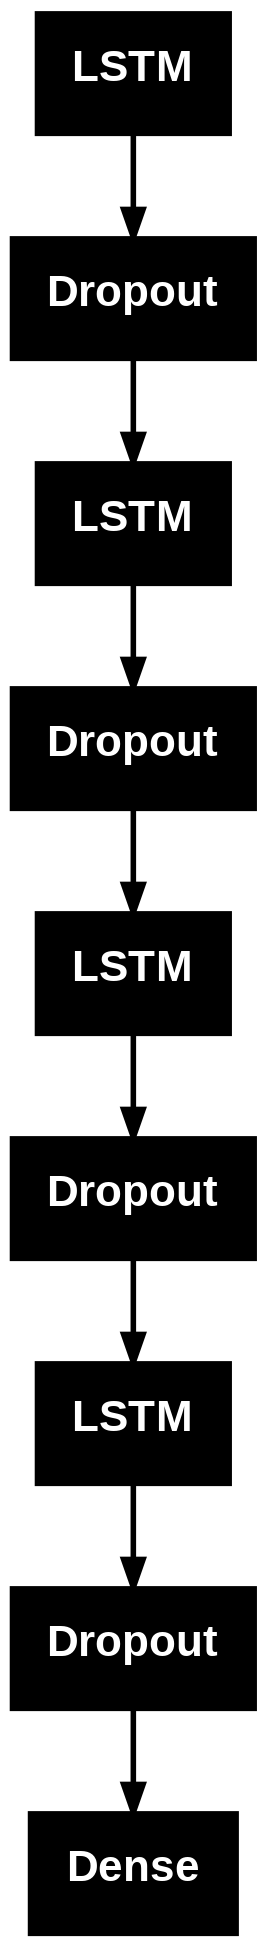

In [30]:
tf.keras.utils.plot_model(model, to_file='my_model.png')


In [32]:
# Run tensorboard with the logdir
import os
LOG_BASE_DIR = './log'
os.makedirs(LOG_BASE_DIR, exist_ok=True)

In [34]:
# !ls -l log

## Load the Colab TensorBoard extention and start TensorBoard inline

In [36]:
# %load_ext tensorboard.notebook
# %tensorboard --logdir {LOG_BASE_DIR}

## Define a TensorBoard callback

In [37]:
import datetime
logdir = os.path.join(LOG_BASE_DIR, datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))

In [38]:
from tensorflow.keras.callbacks import TensorBoard

tbCallBack = TensorBoard(logdir,histogram_freq=1)

The model will be compiled and optimize by the adam optimizer and set the loss function as mean_squarred_error

In [39]:
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [40]:
import os
print(os.environ)

environ({'SHELL': '/bin/bash', 'NV_LIBCUBLAS_VERSION': '12.2.5.6-1', 'NVIDIA_VISIBLE_DEVICES': 'all', 'COLAB_JUPYTER_TRANSPORT': 'ipc', 'NV_NVML_DEV_VERSION': '12.2.140-1', 'NV_CUDNN_PACKAGE_NAME': 'libcudnn8', 'CGROUP_MEMORY_EVENTS': '/sys/fs/cgroup/memory.events /var/colab/cgroup/jupyter-children/memory.events', 'NV_LIBNCCL_DEV_PACKAGE': 'libnccl-dev=2.19.3-1+cuda12.2', 'NV_LIBNCCL_DEV_PACKAGE_VERSION': '2.19.3-1', 'VM_GCE_METADATA_HOST': '169.254.169.253', 'HOSTNAME': '5a5e61ee08ef', 'LANGUAGE': 'en_US', 'TBE_RUNTIME_ADDR': '172.28.0.1:8011', 'COLAB_TPU_1VM': '', 'GCE_METADATA_TIMEOUT': '3', 'NVIDIA_REQUIRE_CUDA': 'cuda>=12.2 brand=tesla,driver>=470,driver<471 brand=unknown,driver>=470,driver<471 brand=nvidia,driver>=470,driver<471 brand=nvidiartx,driver>=470,driver<471 brand=geforce,driver>=470,driver<471 brand=geforcertx,driver>=470,driver<471 brand=quadro,driver>=470,driver<471 brand=quadrortx,driver>=470,driver<471 brand=titan,driver>=470,driver<471 brand=titanrtx,driver>=470,dr

In [41]:
tf.test.gpu_device_name()

'/device:GPU:0'

In [42]:
from tensorflow.python.client import device_lib
device_lib.list_local_devices()

[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 14524849000955808473
 xla_global_id: -1,
 name: "/device:GPU:0"
 device_type: "GPU"
 memory_limit: 14626652160
 locality {
   bus_id: 1
   links {
   }
 }
 incarnation: 6606415625853138803
 physical_device_desc: "device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5"
 xla_global_id: 416903419]

In [44]:
from time import time
start = time()
history = model.fit(features, labels, epochs = 20, batch_size = 32, verbose = 1)
end = time()

Epoch 1/20
338/338 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - loss: 4.3162e-04
Epoch 2/20
338/338 ━━━━━━━━━━━━━━━━━━━━ 6s 15ms/step - loss: 4.0823e-04
Epoch 3/20
338/338 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - loss: 4.2927e-04
Epoch 4/20
338/338 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - loss: 3.8925e-04
Epoch 5/20
338/338 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - loss: 4.9220e-04
Epoch 6/20
338/338 ━━━━━━━━━━━━━━━━━━━━ 10s 14ms/step - loss: 4.2693e-04
Epoch 7/20
338/338 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - loss: 4.1779e-04
Epoch 8/20
338/338 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - loss: 4.4670e-04
Epoch 9/20
338/338 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step - loss: 4.1828e-04
Epoch 10/20
338/338 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - loss: 3.7451e-04
Epoch 11/20
338/338 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step - loss: 4.6041e-04
Epoch 12/20
338/338 ━━━━━━━━━━━━━━━━━━━━ 9s 13ms/step - loss: 4.3409e-04
Epoch 13/20
338/338 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - loss: 3.7567e-04
Epoch 14/20
338/338 ━━━━━━━━━━━━━━━━━━━━ 10s 14ms/step - lo

In [45]:
print('Total training time {} seconds'.format(end - start))

Total training time 134.52753376960754 seconds


In [46]:
#  [samples, days, features]
print(features.shape)

(10793, 60, 1)


In [48]:
import yfinance as yf

# Downloading stock data using yfinance
tickers = 'AAPL'
testing_start_date = '2019-01-01'
testing_end_date = '2019-04-10'

test_stock_data = yf.download(tickers, start=testing_start_date, end=testing_end_date)


[*********************100%***********************]  1 of 1 completed


In [49]:
test_stock_data.tail()

Price,Adj Close,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,,
2019-04-03 00:00:00+00:00,46.897846,48.837502,49.125000,48.287498,48.312500,93087200
2019-04-04 00:00:00+00:00,46.979458,48.922501,49.092499,48.285000,48.697498,76457200
2019-04-05 00:00:00+00:00,47.293953,49.250000,49.275002,48.982498,49.112499,74106400
2019-04-08 00:00:00+00:00,48.038170,50.025002,50.057499,49.084999,49.105000,103526800
2019-04-09 00:00:00+00:00,47.894131,49.875000,50.712502,49.807499,50.080002,143072800


In [50]:
test_stock_data_processed = test_stock_data.iloc[:, 1:2].values


In [51]:
print(test_stock_data_processed.shape)

(68, 1)


In [52]:
all_stock_data = pd.concat((stock_data['Close'], test_stock_data['Close']), axis = 0)

In [53]:
inputs = all_stock_data[len(all_stock_data) - len(test_stock_data) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)

In [54]:
X_test = []
for i in range(60, 129):
    X_test.append(inputs[i-60:i, 0])

In [55]:
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = model.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 138ms/step


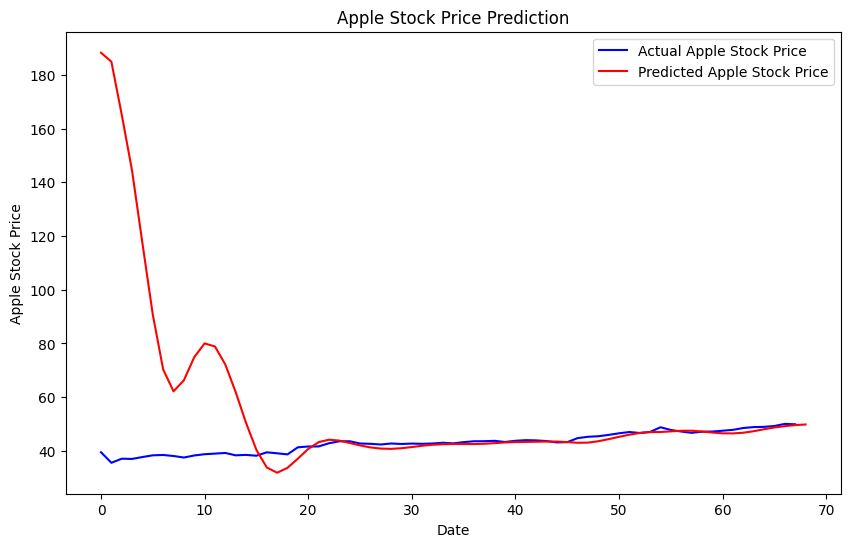

In [56]:
plt.figure(figsize=(10,6))
plt.plot(test_stock_data_processed, color='blue', label='Actual Apple Stock Price')
plt.plot(predicted_stock_price , color='red', label='Predicted Apple Stock Price')
plt.title('Apple Stock Price Prediction')
plt.xlabel('Date')
plt.ylabel('Apple Stock Price')
plt.legend()
plt.show()

In [57]:
#inputs = inputs.reshape(-1,1)
#inputs = sc.transform(inputs)


test_inputs = test_stock_data_processed.reshape(-1,1)
test_inputs = sc.transform(test_inputs)


print(test_inputs.shape)

(68, 1)


In [59]:
test_features = []
for i in range(60, 291):
    slice_data = test_inputs[i-60:i, 0]
    if len(slice_data) == 60:  # Check if the slice has the correct length
        test_features.append(slice_data)


In [61]:
# Convert test_features to a NumPy array
test_features = np.array(test_features)

# Now you can reshape the array
test_features = np.reshape(test_features, (test_features.shape[0], test_features.shape[1], 1))

# Print the shape to confirm
print(test_features.shape)


(9, 60, 1)


In [62]:
predicted_stock_price = model.predict(test_features)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


In [63]:
predicted_stock_price = sc.inverse_transform(predicted_stock_price)
print(predicted_stock_price.shape)

(9, 1)


In [64]:
print(test_stock_data_processed.shape)

(68, 1)


## Download the model and the weights

In [66]:
from google.colab import files

In [67]:
model_json = model.to_json()
with open("model.json", "w") as json_file:
  json_file.write(model_json)

In [68]:
files.download("model.json")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [69]:
model.save('weights.h5')
files.download('weights.h5')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>